In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

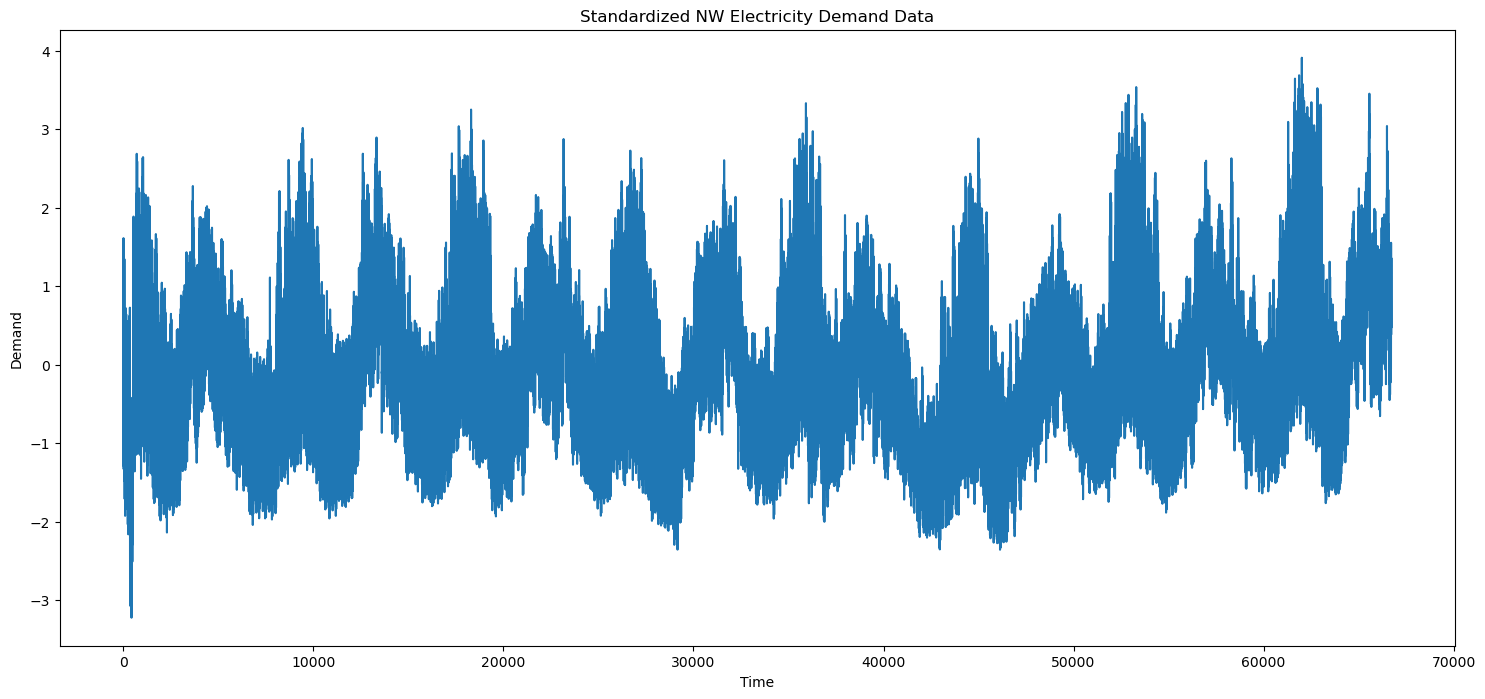

In [3]:
plt.figure(figsize=(18, 8))
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title("Standardized NW Electricity Demand Data")
plt.plot(data['D'])
plt.show()
plt.close()

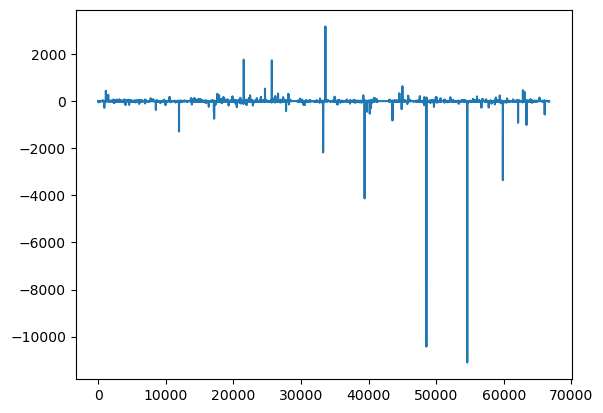

In [4]:
plt.plot(data['D'].pct_change().dropna())

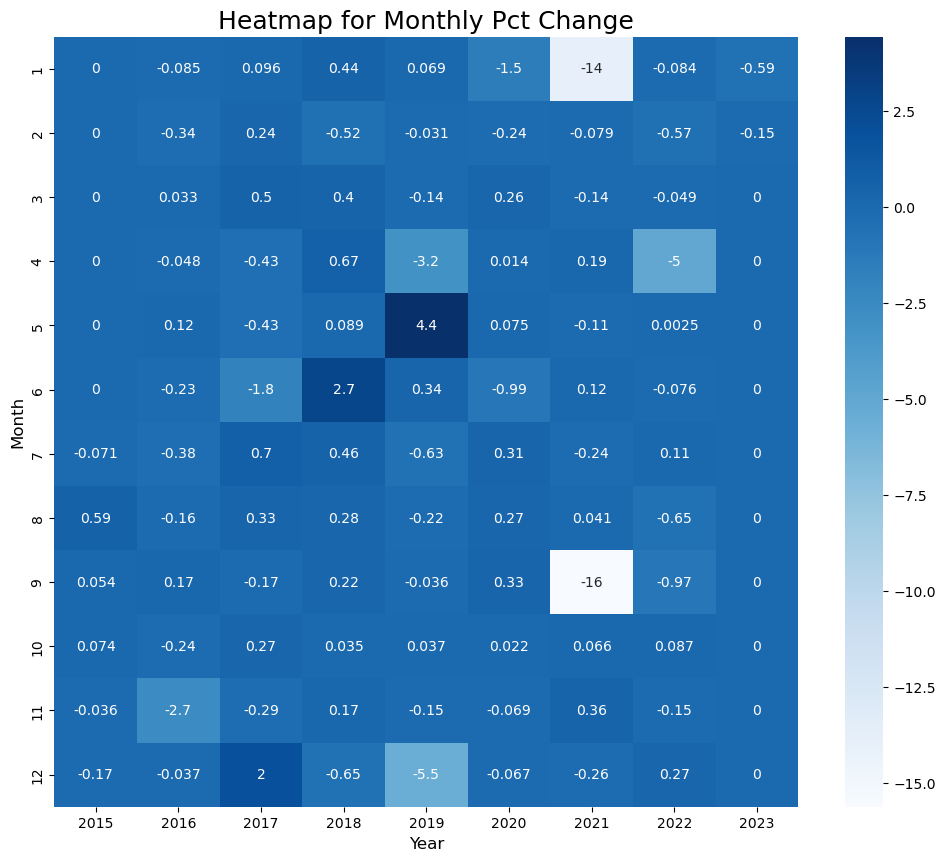

In [5]:
demand_pct = data[['UTC time','D']].set_index('UTC time').pct_change(1).dropna()
demand_pct.index = pd.to_datetime(demand_pct.index)
monthly_pct = demand_pct.groupby(pd.Grouper(freq='M')).mean().reset_index()
heatmap_df = {i:{j:0 for j in range(1,13)} for i in range(2015,2024)}
for i in range(len(monthly_pct)):
    tmp = monthly_pct.iloc[i]
    heatmap_df[tmp['UTC time'].year][tmp['UTC time'].month] = tmp.D

plt.figure(figsize=(12,10))
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(pd.DataFrame(heatmap_df), annot=True, cmap='Blues')
plt.title('Heatmap for Monthly Pct Change',size=18)
plt.xlabel('Year',size=12)
plt.ylabel('Month',size=12)
plt.show()
plt.close()

In [16]:
labels = pd.read_csv('labels.csv', index_col=0)
labels.head()

,isolation forest,random forest,one class svm,autoencoder,kmeans,dbscan,final label
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


In [17]:
true_labels = np.where(labels['final label']==-1)[0]
d = {}
for i in labels.columns[:-1]:
    tmp = np.where(labels[i]==-1)[0]
    d[i] = len(set(tmp).intersection(set(true_labels)))

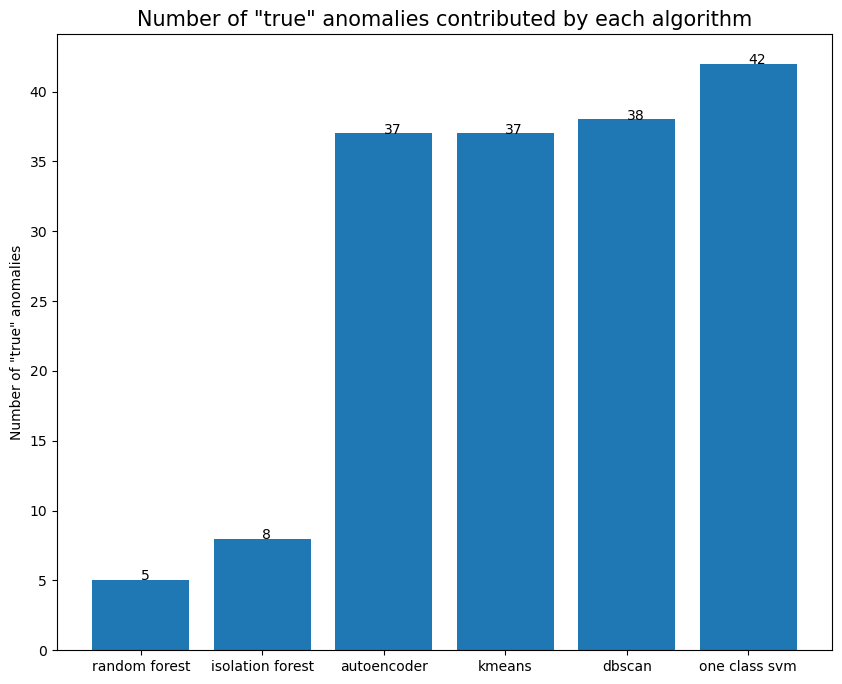

In [18]:
sorted_data = sorted(d.items(), key=lambda x: x[1])

# Extract keys and values from the sorted dictionary
keys = [item[0] for item in sorted_data]
values = [item[1] for item in sorted_data]

# Plot the histogram in ascending order
plt.figure(figsize=(10,8))
plt.bar(keys, values)
for i in range(len(keys)):
    plt.text(keys[i], values[i], values[i])
plt.ylabel('Number of "true" anomalies')
plt.title('Number of "true" anomalies contributed by each algorithm',size=15)
plt.show()
plt.savefig('histogram of true label number.jpg')
plt.close()

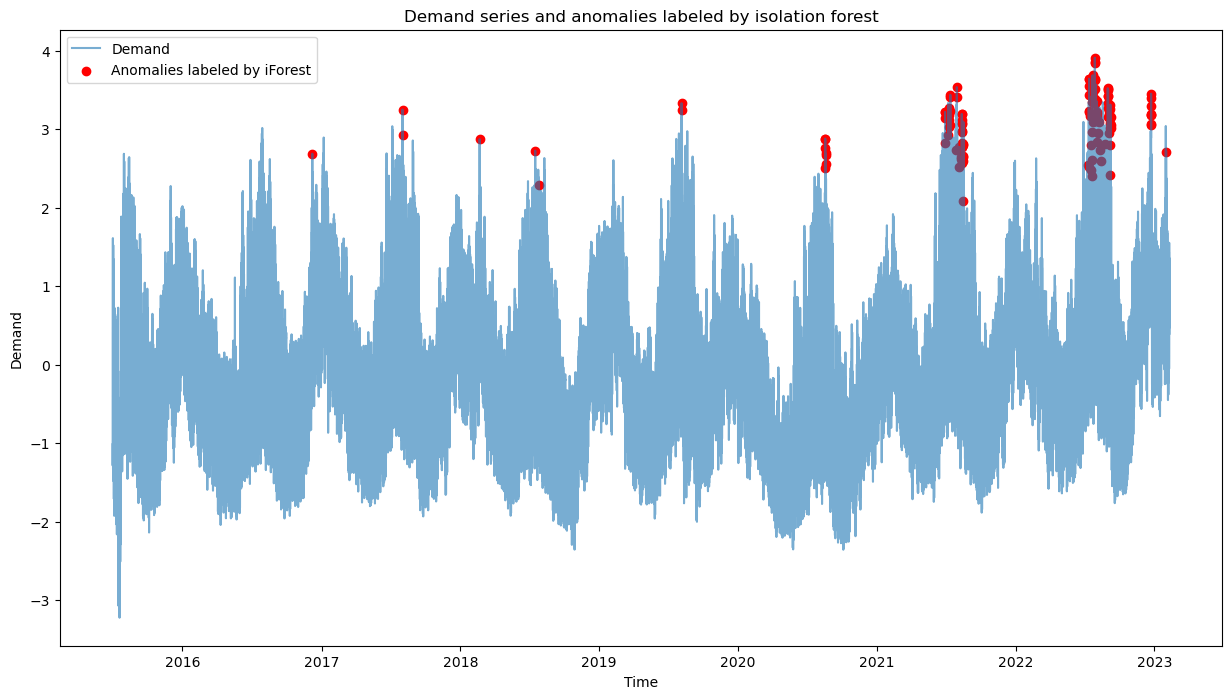

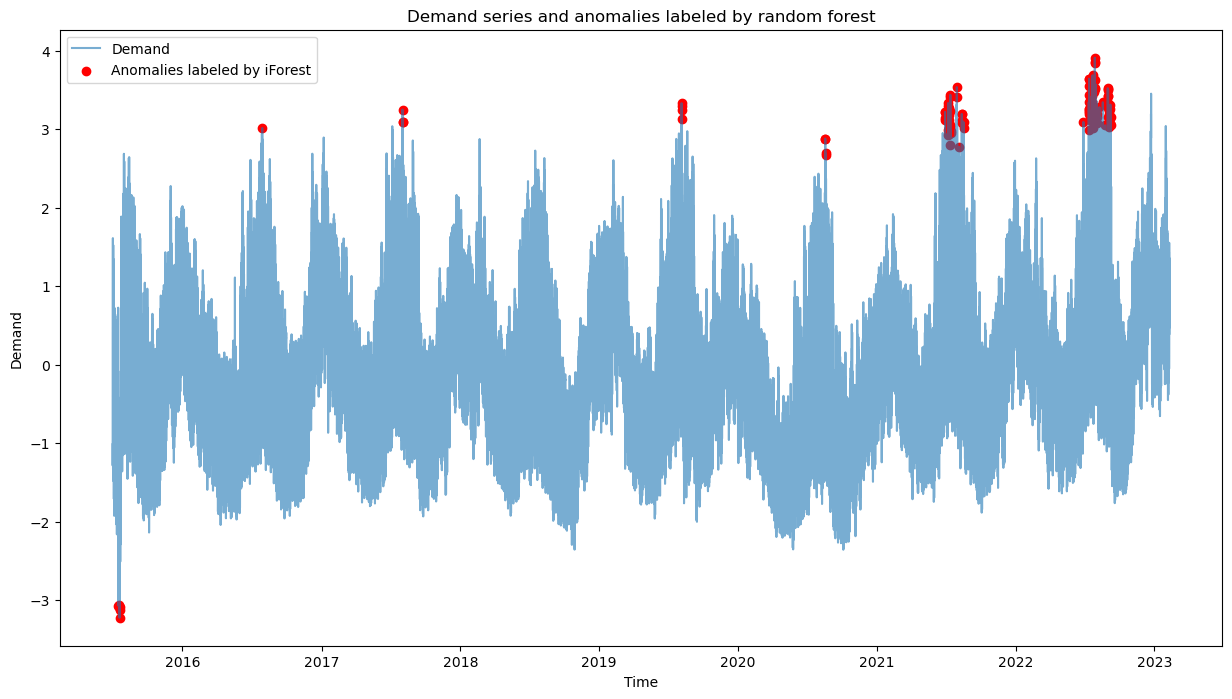

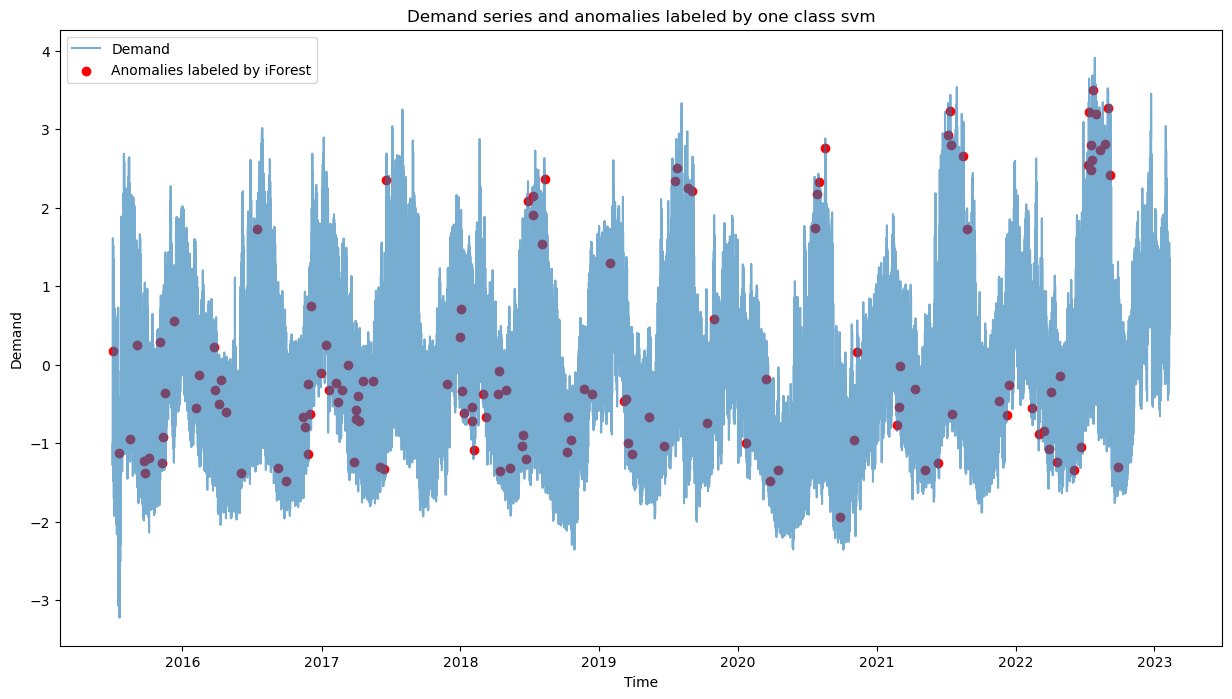

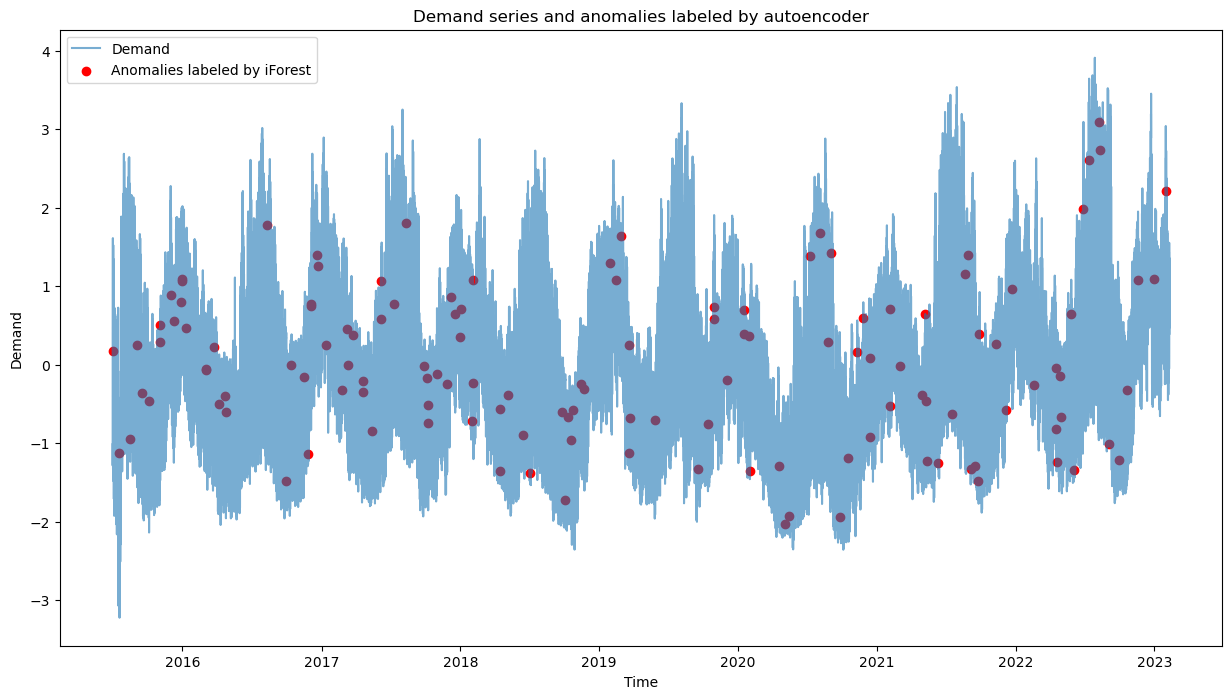

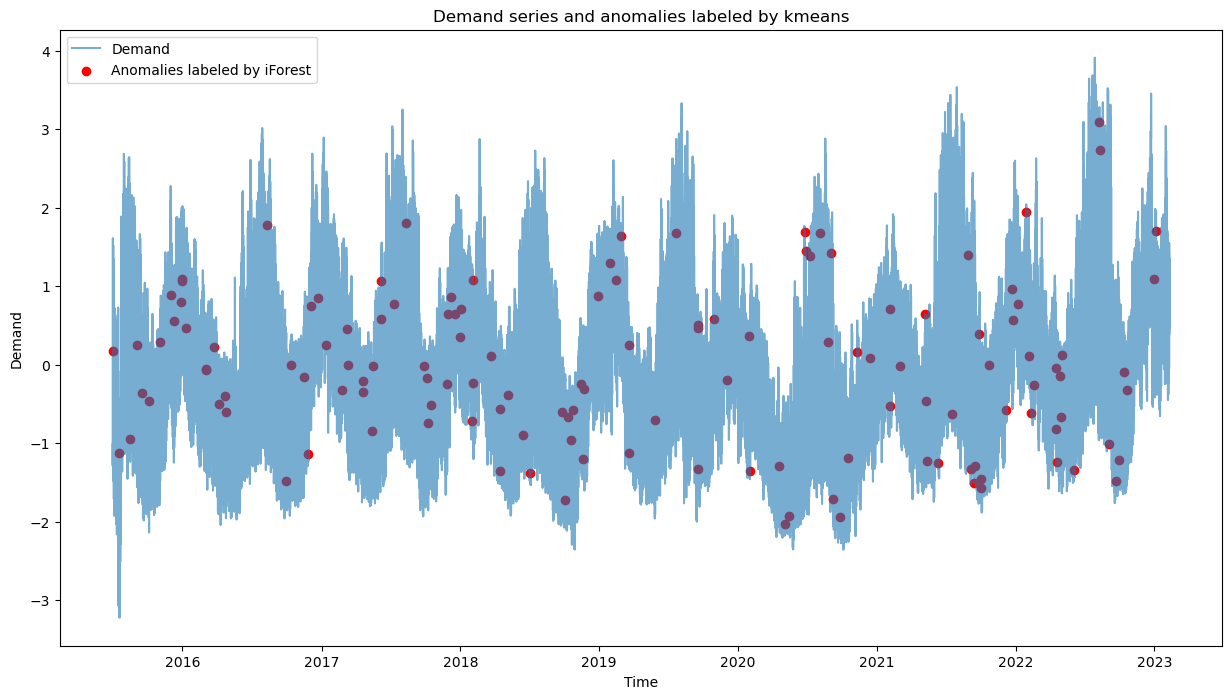

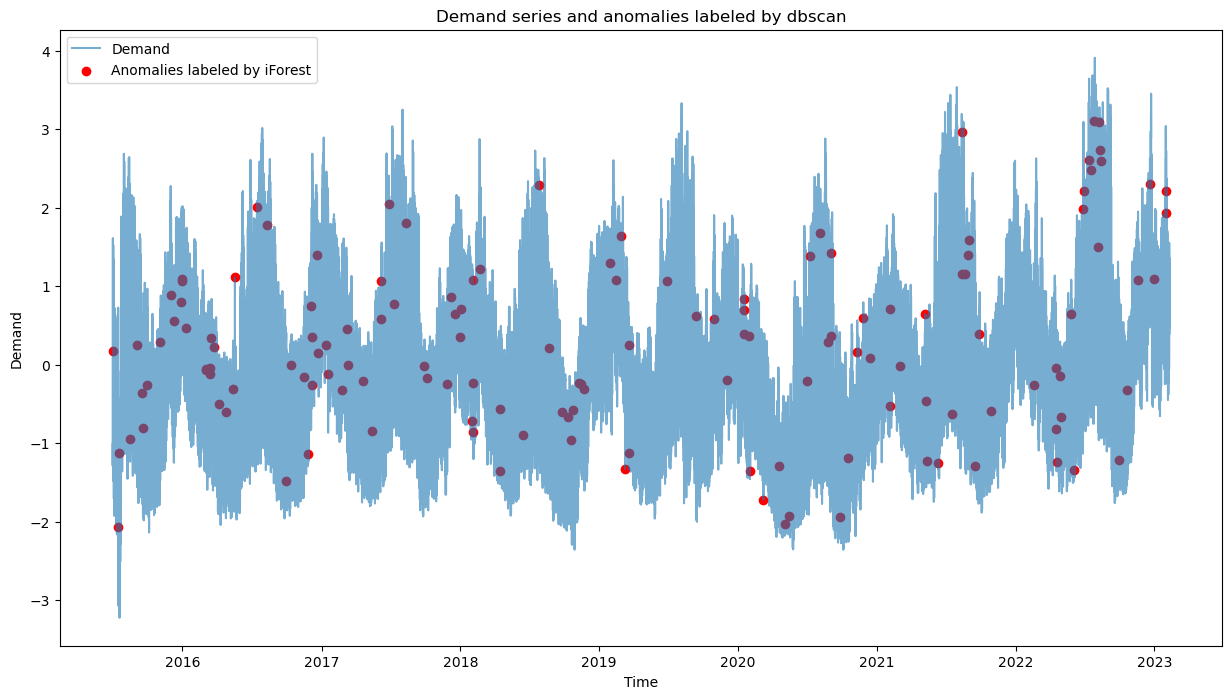

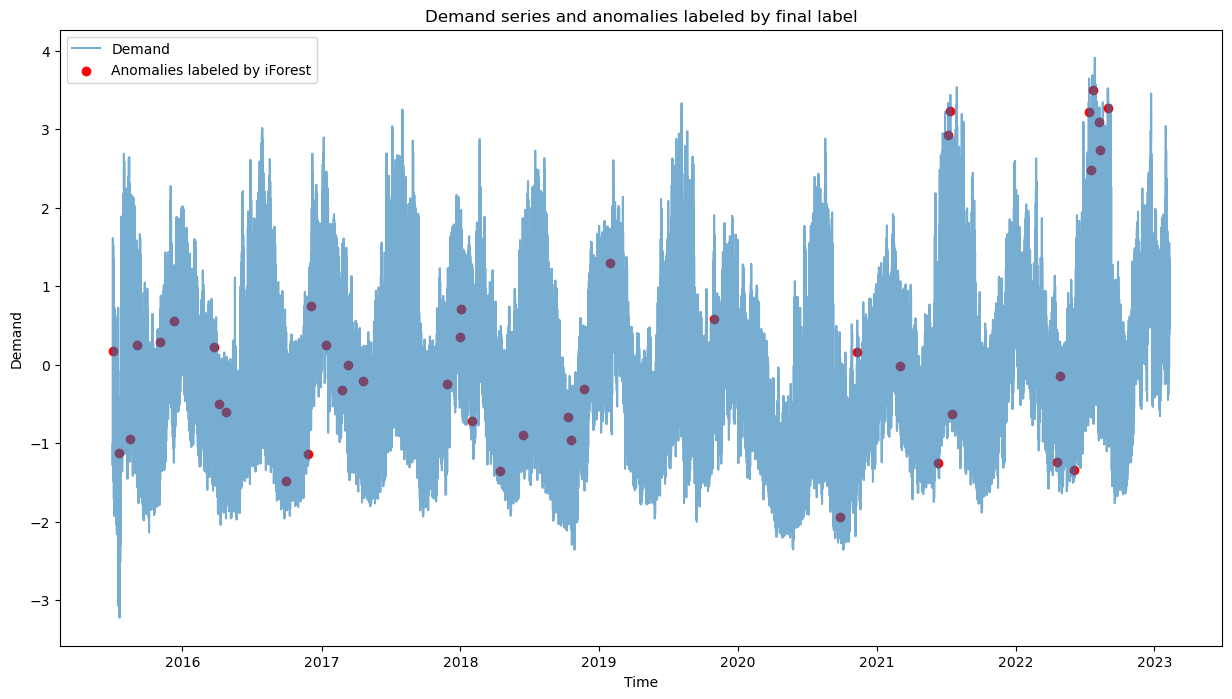

In [9]:
for i in labels.columns:

    anomalies_idx = labels.index[labels[i] == -1].tolist()
    anomalies = data.loc[anomalies_idx]

    fig, ax = plt.subplots(figsize=(15, 8))

    ax.plot(pd.to_datetime(data['UTC time'].to_list()), data['D'], alpha=0.6,label='Demand')
    ax.scatter(pd.to_datetime(anomalies['UTC time'].to_list()), anomalies['D'], color='red', label='Anomalies labeled by iForest')

    plt.title('Demand series and anomalies labeled by {}'.format(i))
    plt.xlabel('Time')
    plt.ylabel('Demand')
    plt.legend()
    plt.show()

In [10]:
data = pd.read_excel('Region_NW.xlsx')
demand = data[['UTC time','D']].dropna()

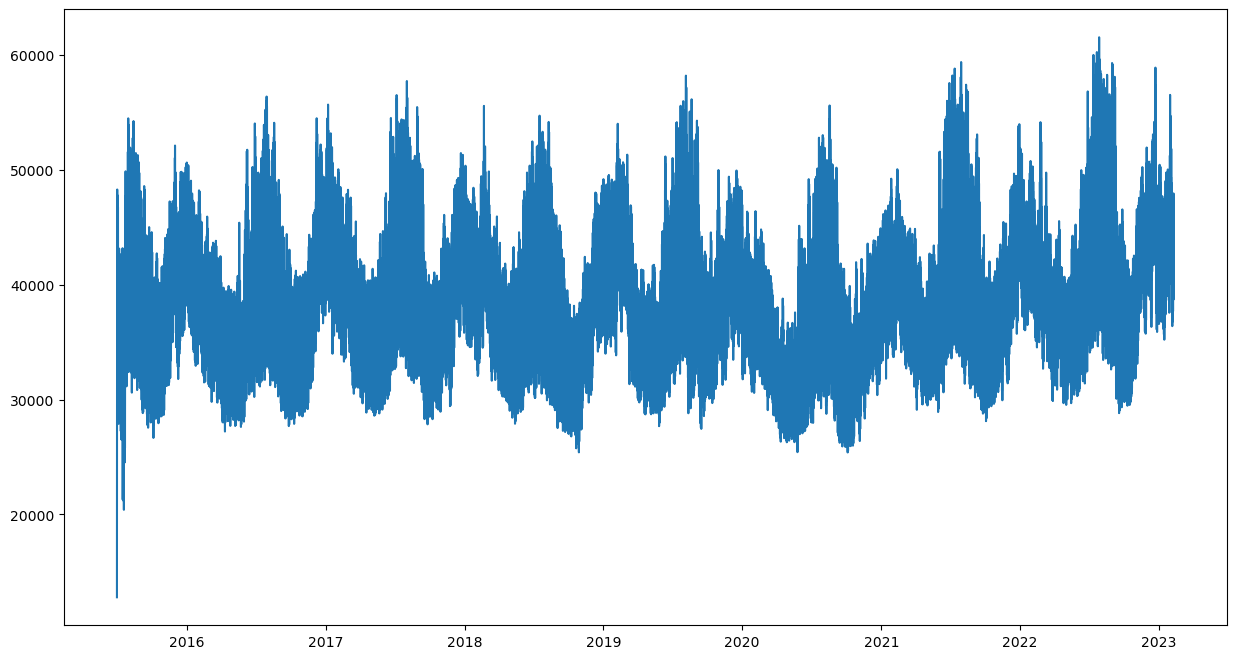

In [11]:
plt.figure(figsize=(15,8))
plt.plot(demand.set_index('UTC time'))
plt.show()

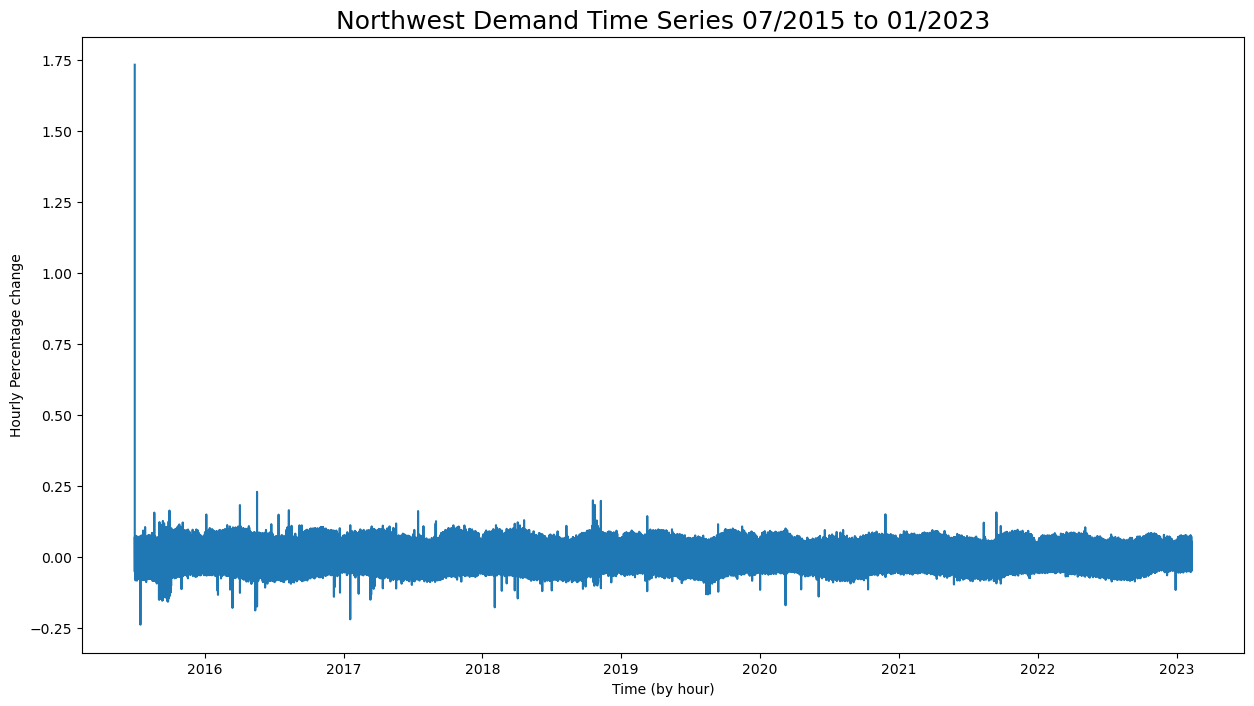

In [12]:
demand_pct = demand.set_index('UTC time').pct_change(1).dropna()
# demand_pct_2 = demand_pct[['D']].pct_change(1).dropna()
plt.figure(figsize=(15,8))
plt.title('Northwest Demand Time Series 07/2015 to 01/2023',size=18)
plt.xlabel('Time (by hour)')
plt.ylabel('Hourly Percentage change')
plt.plot(demand_pct['D'])
plt.show()

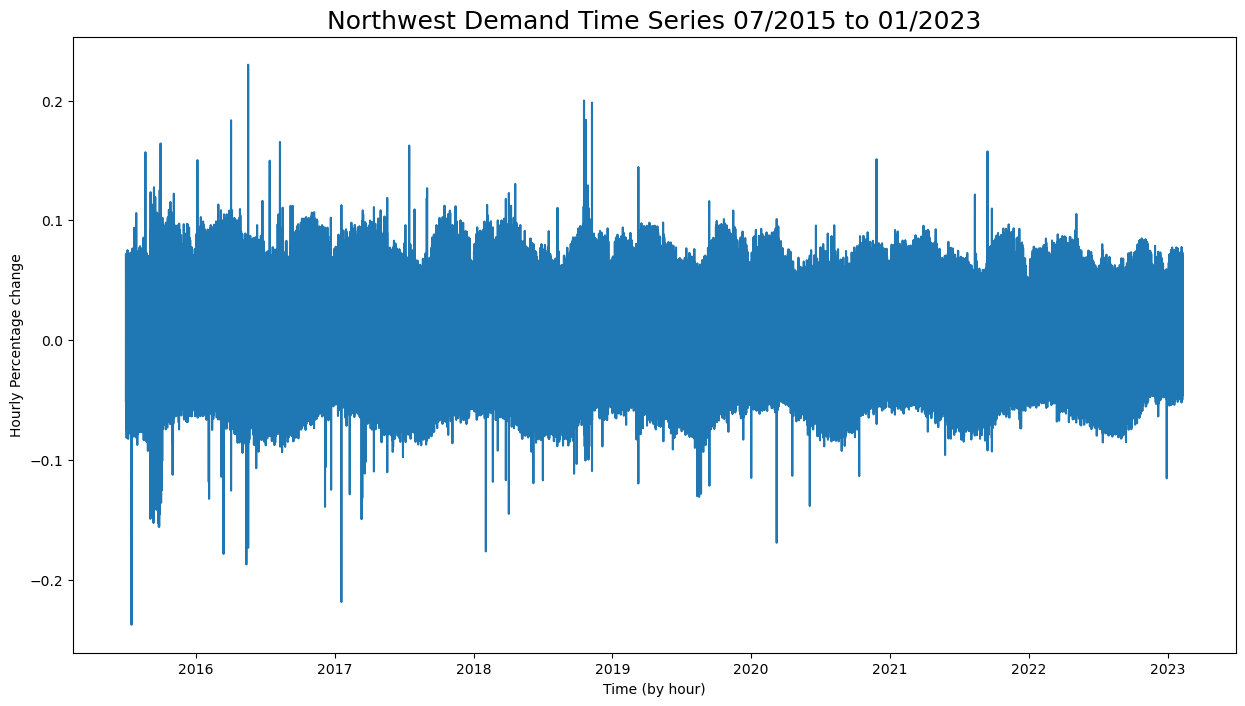

In [13]:
plt.figure(figsize=(15,8))
plt.title('Northwest Demand Time Series 07/2015 to 01/2023',size=18)
plt.xlabel('Time (by hour)')
plt.ylabel('Hourly Percentage change')
plt.plot(demand_pct.iloc[1:])
plt.show()

In [14]:
demand_pct = demand.set_index('UTC time').pct_change(1).dropna()
monthly_pct = demand_pct.groupby(pd.Grouper(freq='M')).mean().reset_index()
heatmap_df = {i:{j:0 for j in range(1,13)} for i in range(2015,2024)}
for i in range(len(monthly_pct)):
    tmp = monthly_pct.iloc[i]
    heatmap_df[tmp['UTC time'].year][tmp['UTC time'].month] = tmp.D


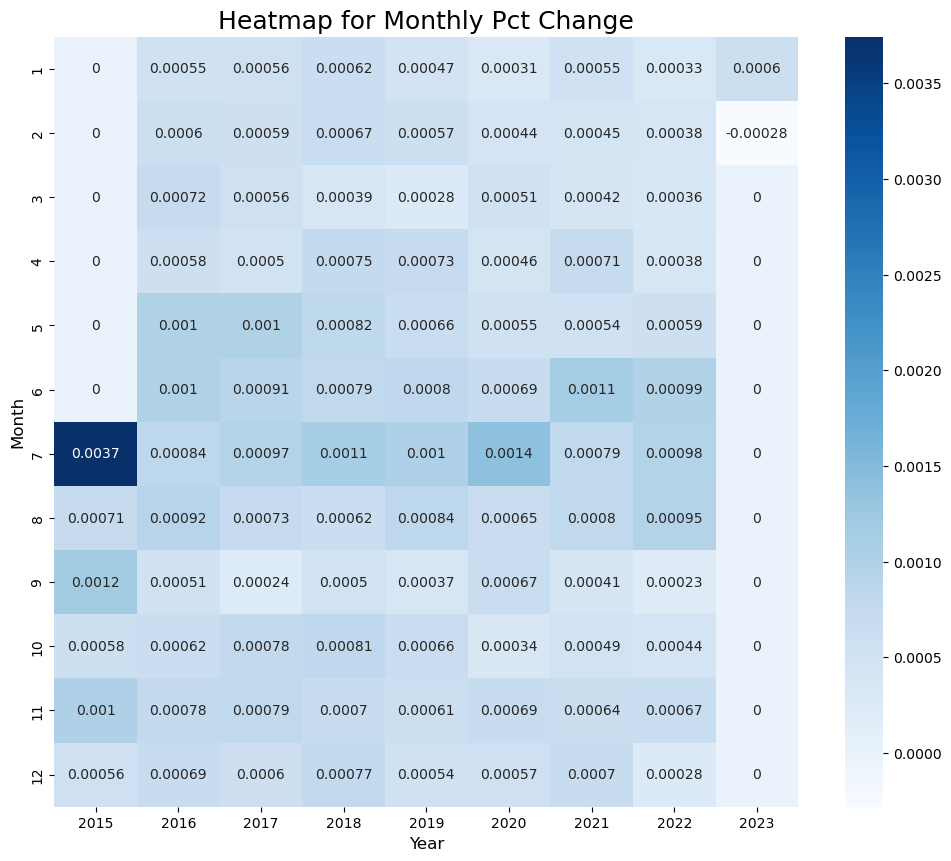

In [15]:
plt.figure(figsize=(12,10))
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(pd.DataFrame(heatmap_df), annot=True, cmap='Blues')
plt.title('Heatmap for Monthly Pct Change',size=18)
plt.xlabel('Year',size=12)
plt.ylabel('Month',size=12)
plt.show()